In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:

x=df[['Annual Income (k$)','Spending Score (1-100)']].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
x_sc=StandardScaler()
x_scaled=x_sc.fit_transform(x)
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## **K-Means Clustering**

In [13]:
k_means=KMeans(n_clusters=4,random_state=100)
k_means.fit(x_scaled)
y_kmeans=k_means.fit_predict(x_scaled)
y_kmeans

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

<Axes: >

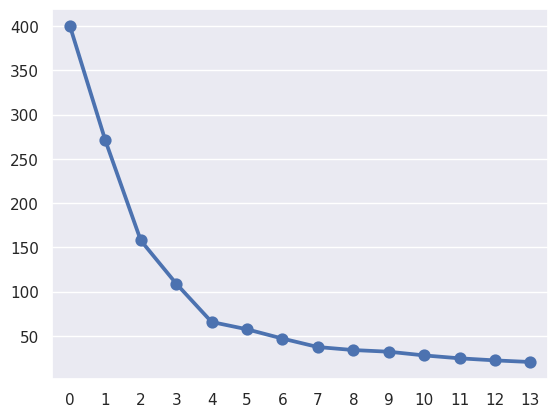

In [11]:
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,random_state=100)
  km.fit(x_scaled)
  wcss.append(km.inertia_)
sns.pointplot(wcss)

Silhouettee Score is =  0.5546571631111091


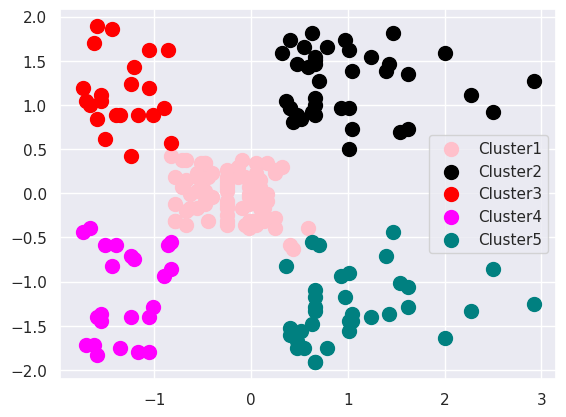

In [17]:
kmeans=KMeans(n_clusters=5,random_state=100)
y_kmeans=kmeans.fit_predict(x_scaled)
print("Silhouettee Score is = ",silhouette_score(x_scaled,y_kmeans,random_state=100))

plt.scatter(x_scaled[y_kmeans==0,0],x_scaled[y_kmeans==0,1],s=100,c='pink',label='Cluster1')
plt.scatter(x_scaled[y_kmeans==1,0],x_scaled[y_kmeans==1,1],s=100,c='black',label='Cluster2')
plt.scatter(x_scaled[y_kmeans==2,0],x_scaled[y_kmeans==2,1],s=100,c='red',label='Cluster3')
plt.scatter(x_scaled[y_kmeans==3,0],x_scaled[y_kmeans==3,1],s=100,c='magenta',label='Cluster4')
plt.scatter(x_scaled[y_kmeans==4,0],x_scaled[y_kmeans==4,1],s=100,c='teal',label='Cluster5')
plt.legend()
plt.show()

### The prime customers to be focused are of Cluster 2 and Cluster 5

## **Hierarchical Clustering**

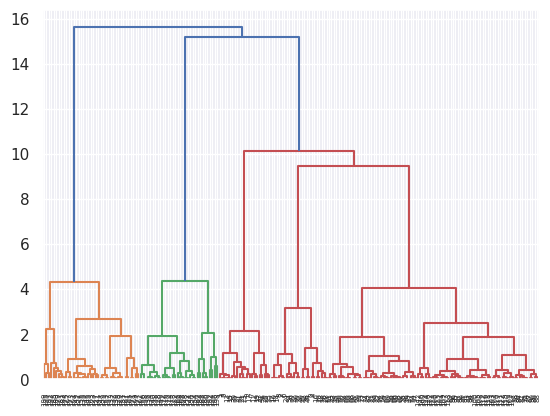

In [18]:
dendrogram = sch.dendrogram(sch.linkage(x_scaled,method='ward'))

In [26]:
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [27]:
y_hc=hc.fit_predict(x_scaled)
combined_cluster=pd.concat([df,pd.DataFrame(y_hc)],axis=1)

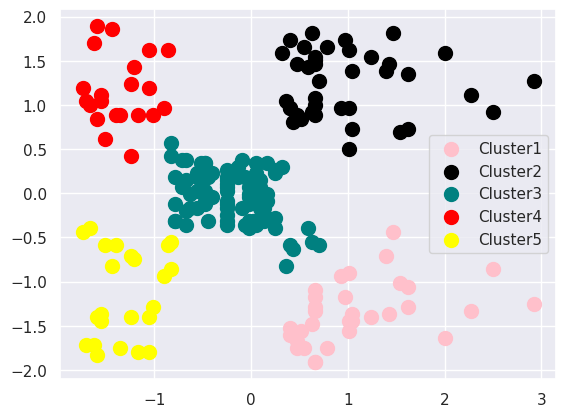

In [28]:
plt.scatter(x_scaled[y_hc==0,0],x_scaled[y_hc==0,1],s=100,c='pink',label='Cluster1')
plt.scatter(x_scaled[y_hc==1,0],x_scaled[y_hc==1,1],s=100,c='black',label='Cluster2')
plt.scatter(x_scaled[y_hc==2,0],x_scaled[y_hc==2,1],s=100,c='teal',label='Cluster3')
plt.scatter(x_scaled[y_hc==3,0],x_scaled[y_hc==3,1],s=100,c='red',label='Cluster4')
plt.scatter(x_scaled[y_hc==4,0],x_scaled[y_hc==4,1],s=100,c='yellow',label='Cluster5')

plt.legend()
plt.show()

### The prime customers to be focused should be of Cluster 1 and Cluster 2